# importing needed libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
import seaborn as sns


# load the dataset

In [2]:
data = pd.read_csv("housing.csv")


In [3]:
data.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

# Preprocessing steps & spliting the datasets 

In [4]:
numeric_columns = data.select_dtypes(include=['number']).columns  # Selecting numeric columns

# Fill NaN values in numeric columns with their respective medians
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())


In [5]:
# Separating features and target variable
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

In [6]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Preprocessing: Creating a preprocessing pipeline
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['ocean_proximity']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# Model 1 Linear Reagression

In [8]:
# Linear Regression Model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

lr_pipeline.fit(X_train, y_train)

# Evaluate models
lr_score = lr_pipeline.score(X_test, y_test)
print(f"Linear Regression Score: {lr_score*100}")


Linear Regression Score: 62.54240620553608


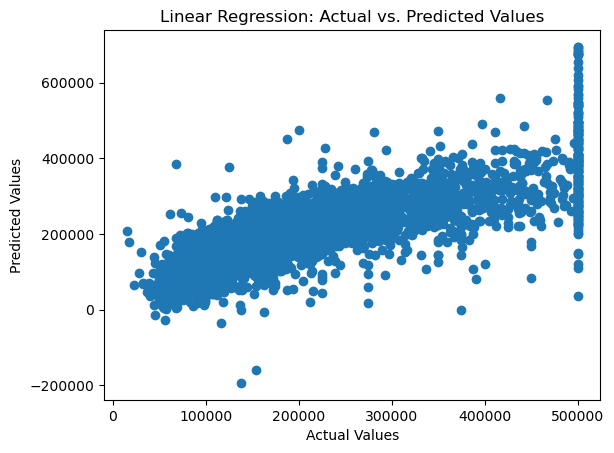

Linear Regression MSE on Test Data: 4908476721.156613
Linear Regression R-squared on Test Data: 0.6254240620553608


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression predictions
lr_predictions = lr_pipeline.predict(X_test)

# Calculating evaluation metrics
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Scatter plot of predicted vs. actual values
plt.scatter(y_test, lr_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.show()

print(f"Linear Regression MSE on Test Data: {lr_mse}")
print(f"Linear Regression R-squared on Test Data: {lr_r2}")


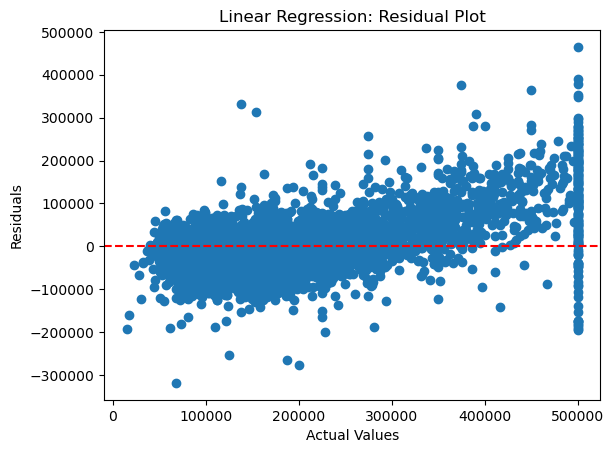

In [10]:
# Residual plot for Linear Regression
residuals_lr = y_test - lr_predictions
plt.scatter(y_test, residuals_lr)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residual Plot')
plt.show()

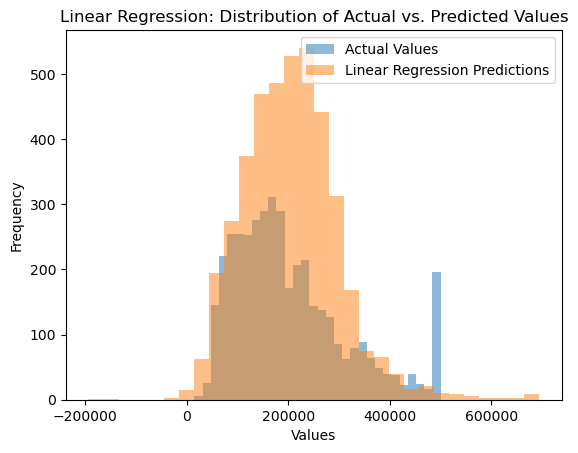

In [11]:
# Distribution plot for Linear Regression
plt.hist(y_test, alpha=0.5, label='Actual Values', bins=30)
plt.hist(lr_predictions, alpha=0.5, label='Linear Regression Predictions', bins=30)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Linear Regression: Distribution of Actual vs. Predicted Values')
plt.show()

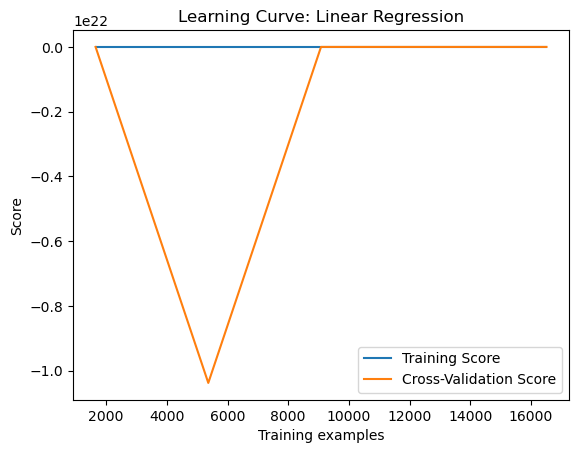

In [12]:
# Learning curve for Linear Regression
train_sizes, train_scores, test_scores = learning_curve(lr_pipeline, X, y, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve: Linear Regression')
plt.legend(loc='best')
plt.show()

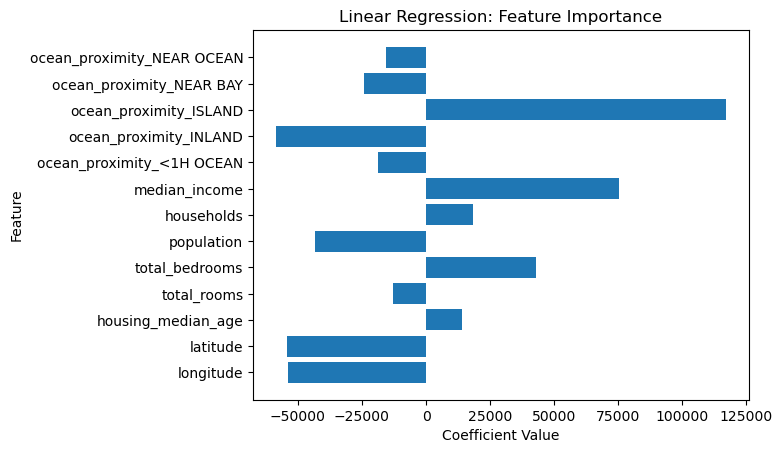

In [13]:
# Feature Importance for Linear Regression
coefficients = lr_pipeline.named_steps['regressor'].coef_
feature_names = numeric_features + list(lr_pipeline.named_steps['preprocessor'].named_transformers_['cat']
                                         .named_steps['encoder'].get_feature_names_out(categorical_features))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression: Feature Importance')
plt.show()

# Model 2 KNN  as regressor  

In [14]:
# KNN Regression Model
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', KNeighborsRegressor(n_neighbors=5))])  #n_neighbors=5

knn_pipeline.fit(X_train, y_train)

# Evaluate models
knn_score = knn_pipeline.score(X_test, y_test)
print(f"KNN Regression Score: {knn_score*100}")


KNN Regression Score: 71.29917188518262


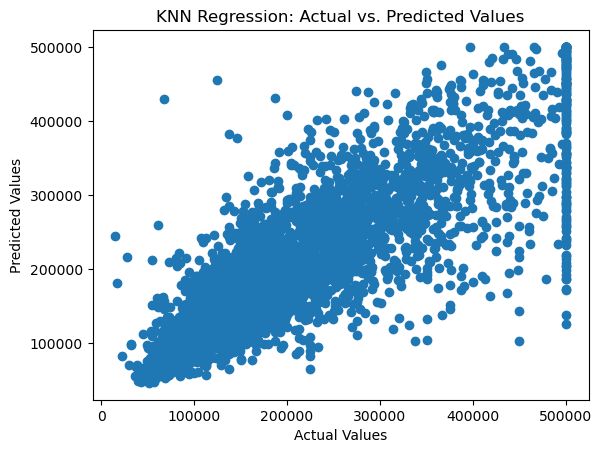

KNN Regression MSE on Test Data: 3760982284.460552
KNN Regression R-squared on Test Data: 0.7129917188518262


In [15]:
# KNN Regression predictions
knn_predictions = knn_pipeline.predict(X_test)

# Calculating evaluation metrics
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Scatter plot of predicted vs. actual values
plt.scatter(y_test, knn_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Actual vs. Predicted Values')
plt.show()

print(f"KNN Regression MSE on Test Data: {knn_mse}")
print(f"KNN Regression R-squared on Test Data: {knn_r2}")


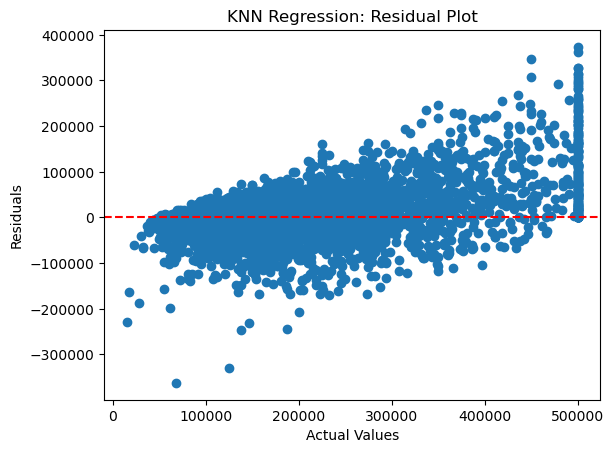

In [16]:
# Residual plot for KNN Regression
residuals_knn = y_test - knn_predictions
plt.scatter(y_test, residuals_knn)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('KNN Regression: Residual Plot')
plt.show()

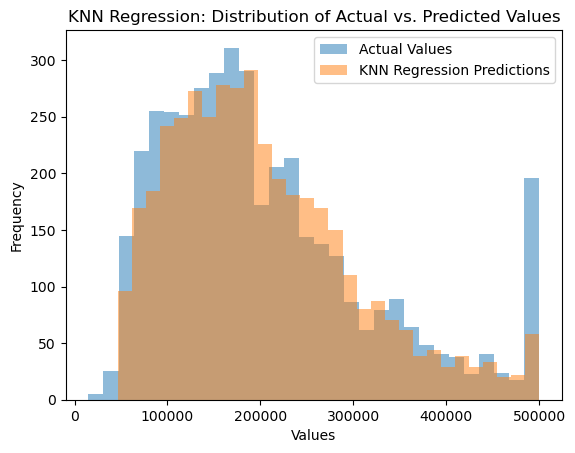

In [17]:
# Distribution plot for KNN Regression
plt.hist(y_test, alpha=0.5, label='Actual Values', bins=30)
plt.hist(knn_predictions, alpha=0.5, label='KNN Regression Predictions', bins=30)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('KNN Regression: Distribution of Actual vs. Predicted Values')
plt.show()

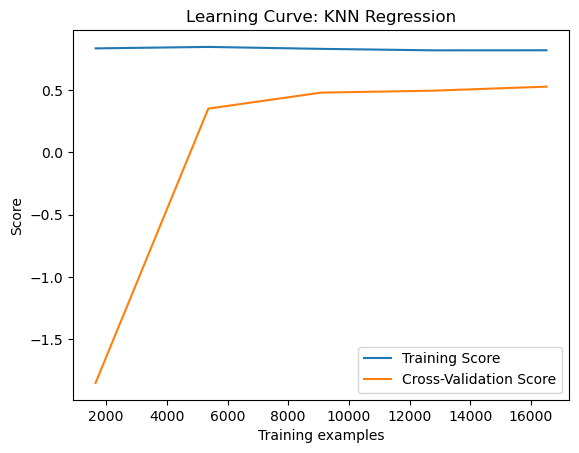

In [18]:
# Learning curve for KNN Regression
train_sizes, train_scores, test_scores = learning_curve(knn_pipeline, X, y, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve: KNN Regression')
plt.legend(loc='best')
plt.show()

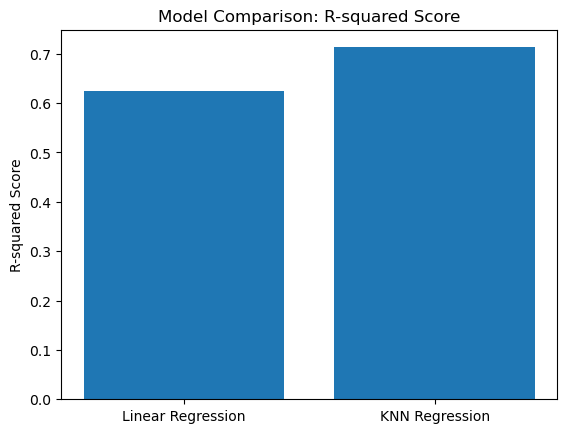

KNN Regression MSE on Test Data: 3760982284.460552
KNN Regression R-squared on Test Data: 0.7129917188518262


In [19]:
# Bar plot comparing model performances
models = ['Linear Regression', 'KNN Regression']
scores = [lr_score, knn_score]

plt.bar(models, scores)
plt.ylabel('R-squared Score')
plt.title('Model Comparison: R-squared Score')
plt.show()

print(f"KNN Regression MSE on Test Data: {knn_mse}")
print(f"KNN Regression R-squared on Test Data: {knn_r2}")

# some helpful cells for documentations 

In [20]:
print(f"Number of samples in training set: {len(X_train)}")
print(f"Number of samples in testing set: {len(X_test)}")

Number of samples in training set: 16512
Number of samples in testing set: 4128


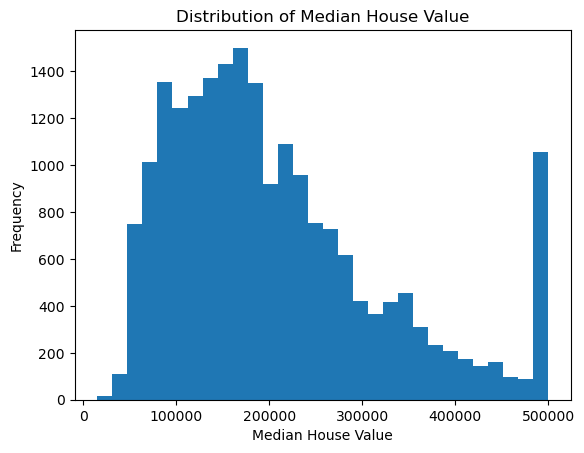

In [21]:
# Check the distribution of the target variable (assuming 'median_house_value')
plt.hist(data['median_house_value'], bins=30)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show()



In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming 'X' contains your feature columns and 'y' contains the target variable

# Column names before preprocessing
original_feature_names = X.columns.tolist()
print("Number of original features:", len(original_feature_names))
print("Original feature names:", original_feature_names)

# Preprocessing steps
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['ocean_proximity']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit and transform the preprocessing on the data
preprocessed_data = preprocessor.fit_transform(X)

# Get transformed feature names
encoded_categories = preprocessor.named_transformers_['cat'].named_steps['encoder'].categories_
encoded_cat_names = [f'{feature}_{value}' for feature, categories in zip(categorical_features, encoded_categories) for value in categories]

transformed_feature_names = numeric_features + encoded_cat_names

print("Number of transformed features:", preprocessed_data.shape[1])
print("Transformed feature names:", transformed_feature_names)


Number of original features: 9
Original feature names: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
Number of transformed features: 13
Transformed feature names: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


In [23]:
print("Dimensions of preprocessed data:", preprocessed_data.shape)


Dimensions of preprocessed data: (20640, 13)


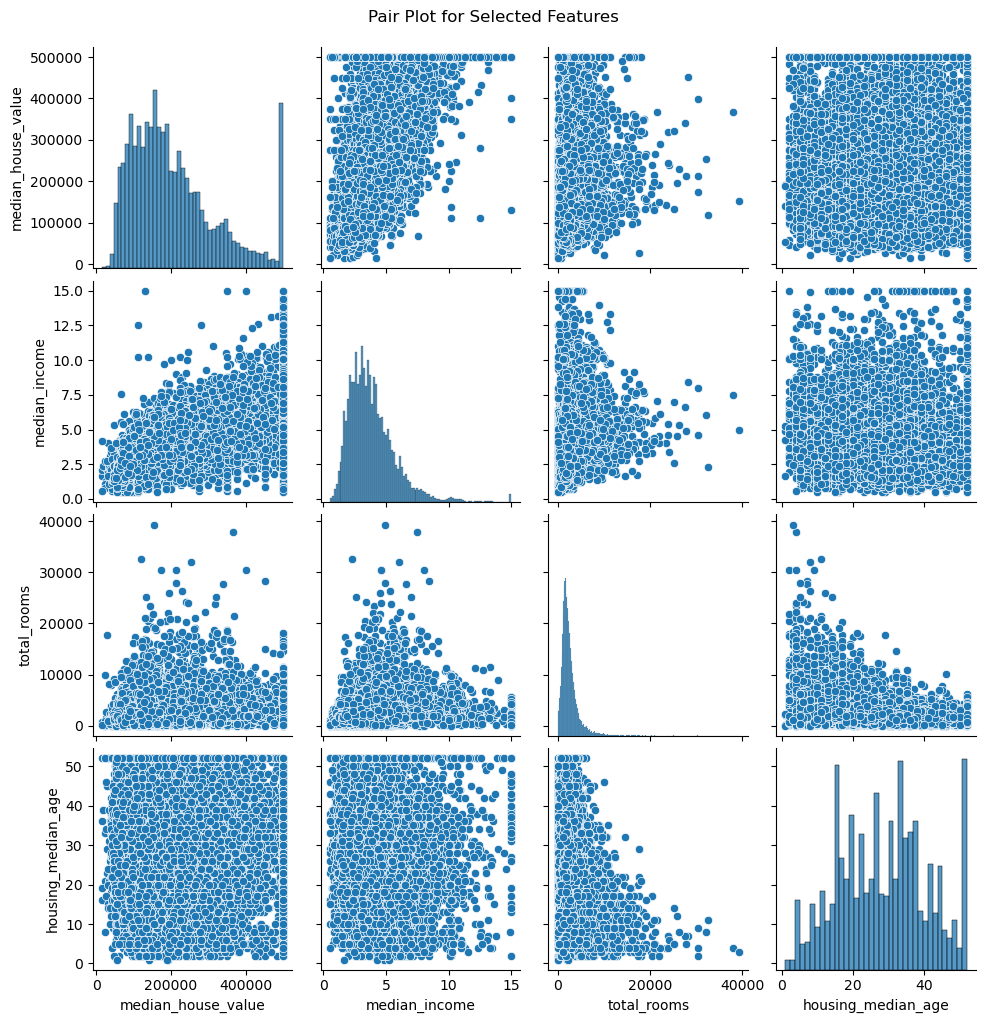

In [24]:
# Pair Plot (select a subset of features)
subset_features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(data[subset_features])
plt.suptitle('Pair Plot for Selected Features', y=1.02)
plt.show()

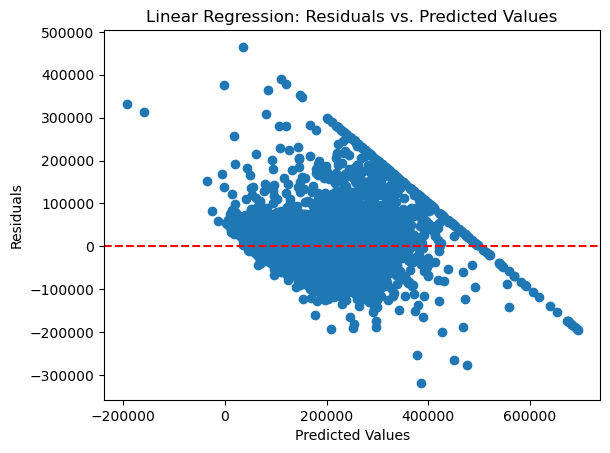

In [25]:
# Residuals vs. Predicted Values Plot for Linear Regression
plt.scatter(lr_predictions, residuals_lr)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals vs. Predicted Values')
plt.show()

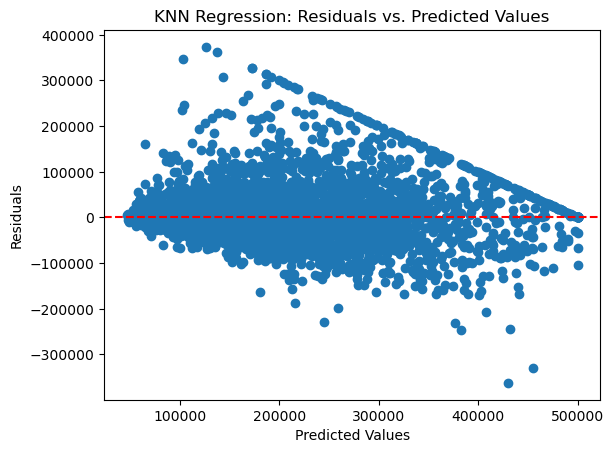

In [26]:
# Residuals vs. Predicted Values Plot for KNN Regression
plt.scatter(knn_predictions, residuals_knn)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('KNN Regression: Residuals vs. Predicted Values')
plt.show()

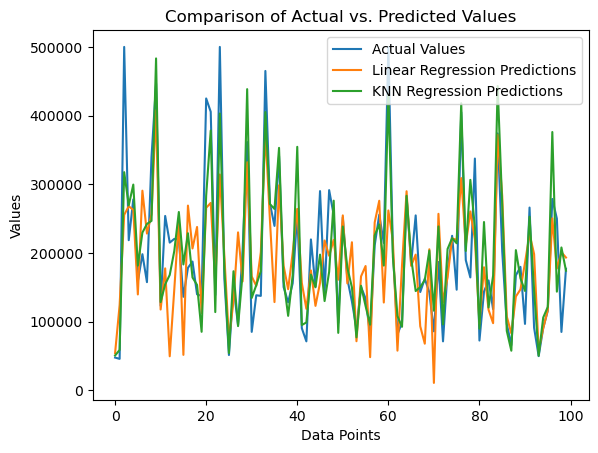

In [27]:
# Actual vs. Predicted Values Line Plot (subset of data points)
plt.plot(y_test[:100].values, label='Actual Values')
plt.plot(lr_predictions[:100], label='Linear Regression Predictions')
plt.plot(knn_predictions[:100], label='KNN Regression Predictions')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Comparison of Actual vs. Predicted Values')
plt.legend()
plt.show()